Loading File

In [ ]:
import pandas as pd

file_path = '/content/Children.csv'  # Replace with your file path
df = pd.read_csv(file_path)

print(df.head())

   CASE_NO_PATIENT'S  Social_Responsiveness_Scale  Age_Years  \
0                  1                          3.0         16   
1                  2                          6.0         15   
2                  3                          7.0         15   
3                  4                          1.0         16   
4                  5                          3.0         15   

  Speech Delay/Language Disorder Learning disorder Genetic_Disorders  \
0                            Yes               Yes               Yes   
1                            Yes               Yes               Yes   
2                            Yes               Yes               Yes   
3                            Yes               Yes                No   
4                            Yes               Yes                No   

  Depression Global developmental delay/intellectual disability  \
0        Yes                                                Yes   
1        Yes                                    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   Social_Responsiveness_Scale                         1976 non-null   float64
 2   Age_Years                                           1985 non-null   int64  
 3   Speech Delay/Language Disorder                      1985 non-null   object 
 4   Learning disorder                                   1985 non-null   object 
 5   Genetic_Disorders                                   1985 non-null   object 
 6   Depression                                          1984 non-null   object 
 7   Global developmental delay/intellectual disability  1985 non-null   object 
 8   Social/Behavioural Issues                           1971 non-null   object 
 9

Dropping null vaues all together as it is less than 5%

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 0 to 1984
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1961 non-null   int64  
 1   Social_Responsiveness_Scale                         1961 non-null   float64
 2   Age_Years                                           1961 non-null   int64  
 3   Speech Delay/Language Disorder                      1961 non-null   object 
 4   Learning disorder                                   1961 non-null   object 
 5   Genetic_Disorders                                   1961 non-null   object 
 6   Depression                                          1961 non-null   object 
 7   Global developmental delay/intellectual disability  1961 non-null   object 
 8   Social/Behavioural Issues                           1961 non-null   object 
 9   Ch

Chi Square test for correlation among categorical values

In [ ]:
from scipy.stats import chi2_contingency

# Assuming 'ASD_Traits' is the target variable and other columns are independent variables
target_variable = 'ASD_traits'

# Iterate through the columns and compute correlation with the target variable
for column in df.columns:
  if column != target_variable:
    # Create a contingency table
    contingency_table = pd.crosstab(df[target_variable], df[column])

    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Correlation between {target_variable} and {column}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print("-" * 20)


Correlation between ASD_traits and CASE_NO_PATIENT'S:
Chi-square statistic: 1960.9999999999998
P-value: 0.48938262686435113
--------------------
Correlation between ASD_traits and Social_Responsiveness_Scale:
Chi-square statistic: 209.06301227817488
P-value: 2.070608067206757e-39
--------------------
Correlation between ASD_traits and Age_Years:
Chi-square statistic: 7.645572495560381
P-value: 0.26523614629278
--------------------
Correlation between ASD_traits and Speech Delay/Language Disorder:
Chi-square statistic: 200.79133708149357
P-value: 1.4032856939057133e-45
--------------------
Correlation between ASD_traits and Learning disorder:
Chi-square statistic: 190.6474381446493
P-value: 2.2962042454349263e-43
--------------------
Correlation between ASD_traits and Genetic_Disorders:
Chi-square statistic: 183.10429123606164
P-value: 1.0177915793451656e-41
--------------------
Correlation between ASD_traits and Depression:
Chi-square statistic: 199.74270221542693
P-value: 2.3767319776

Dropping Columns with More P value of Chi square test

In [ ]:
df = df.drop(['Age_Years', 'CASE_NO_PATIENT\'S',], axis=1)

In [ ]:
print(df['Ethnicity'].unique())

['middle eastern' 'White European' 'Middle Eastern' 'Hispanic' 'Black'
 'Asian' 'South Asian' 'Native Indian' 'Others' 'black' 'asian' 'Latino'
 'Mixed' 'south asian' 'mixed' 'PaciFica']


In [ ]:
# prompt: in data frame, change 'black' as 'Black',  'middle eastern' as  'Middle Eastern', 'asian' as 'Asian', 'south asian' as 'South Asian', 'mixed' as 'Mixed'.

df['Ethnicity'] = df['Ethnicity'].replace({'black': 'Black', 'middle eastern': 'Middle Eastern', 'asian': 'Asian', 'south asian': 'South Asian', 'mixed': 'Mixed'})

Doing Encoding for Categorical values: Label Encoding for all Categorical features except Etnicity where One Hot encoding used.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# Encode binary categorical features (Yes/No)
binary_features = [
    'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 'Depression',
    'Global developmental delay/intellectual disability', 'Social/Behavioural Issues',
    'Anxiety_disorder', 'Family_mem_with_ASD', 'ASD_traits'
]

for feature in binary_features:
    df[feature] = le.fit_transform(df[feature])

# Encode categorical variables with more than two categories (e.g., Sex, Ethnicity)
df['Sex'] = le.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Ethnicity'], drop_first=True)

# Now data is ready for modeling
print(df)


      Social_Responsiveness_Scale  Speech Delay/Language Disorder  \
0                             3.0                               1   
1                             6.0                               1   
2                             7.0                               1   
3                             1.0                               1   
4                             3.0                               1   
...                           ...                             ...   
1980                          1.0                               0   
1981                          0.0                               0   
1982                          1.0                               0   
1983                          0.0                               0   
1984                          1.0                               0   

      Learning disorder  Genetic_Disorders  Depression  \
0                     1                  1           1   
1                     1                  1           1 

Normalizing Continuous Variable using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Social_Responsiveness_Scale', 'Childhood Autism Rating Scale']] = scaler.fit_transform(
    df[['Social_Responsiveness_Scale', 'Childhood Autism Rating Scale']]
)

In [ ]:
df.head()

,Social_Responsiveness_Scale,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,...,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Mixed,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_PaciFica,Ethnicity_South Asian,Ethnicity_White European
0,-0.022663,1,1,1,1,1,1,-0.687744,1,0,...,False,False,False,True,False,False,False,False,False,False
1,0.790298,1,1,1,1,1,1,0.295966,1,1,...,False,False,False,False,False,False,False,False,False,True
2,1.061285,1,1,1,1,1,1,2.263384,1,1,...,False,False,False,True,False,False,False,False,False,False
3,-0.564637,1,1,0,1,1,1,0.295966,1,1,...,False,True,False,False,False,False,False,False,False,False
4,-0.022663,1,1,0,1,1,1,-0.687744,1,0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Define X as all columns except 'ASD_traits'
X = df.drop('ASD_traits', axis=1)  # Features
# Define y as the target column 'ASD_traits'
y = df['ASD_traits']  # Target

Training And testing split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest without Using Best Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# AUC-ROC Score (for binary classification)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
auc_roc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC Score: {auc_roc}')


Accuracy: 0.7862595419847328
Precision: 0.7787610619469026
Recall: 0.8380952380952381
F1 Score: 0.8073394495412844
AUC-ROC Score: 0.8788966952901379


Importance of features

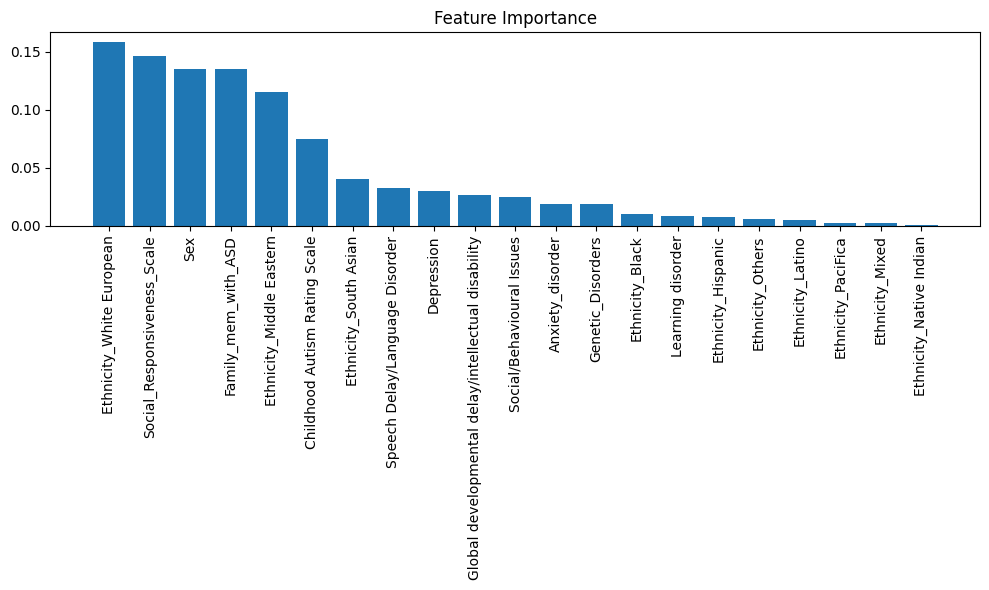

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

Finding best festures using Grid search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.836741214057508


Random Forest Using best parameters from grid search CV

In [ ]:
#best parameters from the grid search
best_params = grid_search.best_params_

# Create a Random Forest model with the best parameters
rf_best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42  # Set a random state for reproducibility
)

# Fit the model to the training data
rf_best_model.fit(X_train, y_train)

# Optional: Print model details
print("Best Random Forest Model:")
print(rf_best_model)

Best Random Forest Model:
RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)


Evaluation metrics after using best parameters

In [ ]:
y_pred = rf_best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.95      0.69      0.80       183
           1       0.78      0.97      0.87       210

    accuracy                           0.84       393
   macro avg       0.87      0.83      0.83       393
weighted avg       0.86      0.84      0.84       393

